In [1]:
# Initialize OK
from client.api.notebook import Notebook
ok = Notebook('hw3.ok')

Assignment: hw3
OK, version v1.13.11



# Homework 3: Bike Sharing
## Exploratory Data Analysis (EDA) and Visualization
## Due Date: Tuesday 10/1, 11:59 PM

**Collaboration Policy**

Data science is a collaborative activity. While you may talk with others about
the homework, we ask that you **write your solutions individually**. If you do
discuss the assignments with others please **include their names** below.

**Collaborators**: *list collaborators here*

## Introduction

Bike sharing systems are new generation of traditional bike rentals where the process of signing up, renting and returning is automated. Through these systems, users are able to easily rent a bike from one location and return them to another. We will be analyzing bike sharing data from Washington D.C. 

In this assignment, you will perform tasks to clean, visualize, and explore the bike sharing data. You will also investigate open-ended questions. These open-ended questions ask you to think critically about how the plots you have created provide insight into the data.

After completing this assignment, you should be comfortable with:

* reading plaintext delimited data into `pandas`
* wrangling data for analysis
* using EDA to learn about your data 
* making informative plots

## Grading
Grading is broken down into autograded answers and free response. 

For autograded answers, the results of your code are compared to provided and/or hidden tests.

For free response, readers will evaluate how well you answered the question and/or fulfilled the requirements of the question.

For plots, your plots should be *similar* to the given examples. We will tolerate small variations such as color differences or slight variations in scale. However it is in your best interest to make the plots as similar as possible, as similarity is subject to the readers.

**Note that for ALL plotting questions from here on out, we will expect appropriate titles, axis labels, legends, etc. The following question serves as a good guideline on what is "enough": If I directly downloaded the plot and viewed it, would I be able to tell what was being visualized without knowing the question?** 

### Score breakdown



Question | Points
--- | ---
Question 0a | 1
Question 0b | 1
Question 1a | 2
Question 1b | 1
Question 1c | 2
Question 2a | 2
Question 2b | 2
Question 2c | 2
Question 2d | 2
Question 3a | 5
Question 3b | 3
Question 4  | 2
Question 5a | 2
Question 5b | 2
Question 6a | 1
Question 6b | 4
Question 6c | 2
Question 7a | 2
Question 7b | 3
Total | 41

In [2]:
# Run this cell to set up your notebook.  Make sure ds100_utils.py is in this assignment's folder
import seaborn as sns
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import zipfile
from pathlib import Path
import ds100_utils

# Default plot configurations
%matplotlib inline
plt.rcParams['figure.figsize'] = (16,8)
plt.rcParams['figure.dpi'] = 150
sns.set()

from IPython.display import display, Latex, Markdown

## Loading Bike Sharing Data
The data we are exploring is collected from a bike sharing system in Washington D.C.

The variables in this data frame are defined as:

Variable       | Description
-------------- | ------------------------------------------------------------------
instant | record index
dteday | date
season | 1. spring <br> 2. summer <br> 3. fall <br> 4. winter
yr | year (0: 2011, 1:2012)
mnth | month ( 1 to 12)
hr | hour (0 to 23)
holiday | whether day is holiday or not
weekday | day of the week
workingday | if day is neither weekend nor holiday
weathersit | 1. clear or partly cloudy <br> 2. mist and clouds <br> 3. light snow or rain <br> 4. heavy rain or snow
temp | normalized temperature in Celsius (divided by 41)
atemp | normalized "feels-like" temperature in Celsius (divided by 50)
hum | normalized percent humidity (divided by 100)
windspeed| normalized wind speed (divided by 67)
casual | count of casual users
registered | count of registered users
cnt | count of total rental bikes including casual and registered  

### Download the Data

In [3]:
# Run this cell to download the data.  No further action is needed

data_url = 'https://github.com/DS-100/fa19/raw/gh-pages/assets/datasets/hw3-bikeshare.zip'
file_name = 'data.zip'
data_dir = '.'

dest_path = ds100_utils.fetch_and_cache(data_url=data_url, data_dir=data_dir, file=file_name)
print('Saved at {}'.format(dest_path))

zipped_data = zipfile.ZipFile(dest_path, 'r')

data_dir = Path('data')
zipped_data.extractall(data_dir)


print("Extracted Files:")
for f in data_dir.glob("*"):
    print("\t",f)

Using version already downloaded: Mon Sep 30 18:03:40 2019
MD5 hash of file: 2bcd2ca89278a8230f4e9461455c0811
Saved at data.zip
Extracted Files:
	 data/bikeshare.txt


### Examining the file contents

Can you identify the file format? (No answer required.)

In [4]:
# Run this cell to look at the top of the file.  No further action is needed
for line in ds100_utils.head(data_dir/'bikeshare.txt'):
    print(line,end="")

instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0,3,13,16
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.8,0,8,32,40
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.8,0,5,27,32
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0,3,10,13


### Size
Is the file big?  How many records do we expect to find? (No answers required.)

In [5]:
# Run this cell to view some metadata.  No further action is needed
print("Size:", (data_dir/"bikeshare.txt").stat().st_size, "bytes")
print("Line Count:", ds100_utils.line_count(data_dir/"bikeshare.txt"), "lines")

Size: 1156736 bytes
Line Count: 17380 lines


### Loading the data

The following code loads the data into a Pandas DataFrame.

In [6]:
# Run this cell to load the data.  No further action is needed
bike = pd.read_csv(data_dir/'bikeshare.txt')
bike.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Below, we show the shape of the file. You should see that the size of the DataFrame matches the number of lines in the file, minus the header row.

In [7]:
bike.shape

(17379, 17)

## 0: Examining the Data

Before we start working with the data, let's examine its granularity.

### Question 0
#### Question 0A
What is the granularity of the data (i.e. what does each row represent)?

<!--
BEGIN QUESTION
name: q0a
points: 1
manual: true
-->
<!-- EXPORT TO PDF -->

Each line represents the number of rental bikes used by registered and casual users at each hour of the day. It also records various weather conditions and whether that day is a holiday or not.

In [8]:
# Use this cell for scratch work. If you need to add more cells for scratch work, add them BELOW this cell.

#### Question 0B
For this assignment, we'll be using this data to study bike usage in Washington D.C. Based on the granularity and the variables present in the data, what might some limitations of using this data be? What are two additional data categories/variables that you can collect to address some of these limitations?

<!--
BEGIN QUESTION
name: q0b
points: 1
manual: true
-->
<!-- EXPORT TO PDF -->

We don't know, for instance, the minute-by-minute breakdown of when rental bikes are used per hour. Having a minutes column with data about this would solve such a problem. Additionally, the temperatures/windspeeds in the data are all normalized by different numbers. This may not make much difference, but having columns with temp, atemp, windspeed etc. with their raw values would allow us to overcome any potential limitations caused by normalizing. A more important limitation would be in the 'cnt' column, since it groups together bike usage from casual and registered users. We can overcome this limitation with a variable/column of cnt_cas and cnt_reg, for instance, which breaks down the count per hour more specifically.

In [9]:
# Use this cell for scratch work. If you need to add more cells for scratch work, add them BELOW this cell.

---
## 1: Data Preparation
A few of the variables that are numeric/integer actually encode categorical data. These include `holiday`, `weekday`, `workingday`, and `weathersit`. In the following problem, we will convert these four variables to strings specifying the categories. In particular, use 3-letter labels (`Sun`, `Mon`, `Tue`, `Wed`, `Thu`, `Fri`, and `Sat`) for `weekday`. You may simply use `yes`/`no` for `holiday` and `workingday`. 

In this exercise we will *mutate* the data frame, **overwriting the corresponding variables in the data frame.** However, our notebook will effectively document this in-place data transformation for future readers. Make sure to leave the underlying datafile `bikeshare.txt` unmodified.

### Question 1
#### Question 1a (Decoding `weekday`, `workingday`, and `weathersit`)


Decode the `holiday`, `weekday`, `workingday`, and `weathersit` fields:

1. `holiday`: Convert to `yes` and `no`.  Hint: There are fewer holidays...
1. `weekday`: It turns out that Monday is the day with the most holidays.  Mutate the `'weekday'` column to use the 3-letter label (`'Sun'`, `'Mon'`, `'Tue'`, `'Wed'`, `'Thu'`, `'Fri'`, and `'Sat'` ...) instead of its current numerical values. Assume `0` corresponds to `Sun`, `1` to `Mon` and so on.
1. `workingday`: Convert to `yes` and `no`.
1. `weathersit`: You should replace each value with one of `Clear`, `Mist`, `Light`, or `Heavy`. Hint: Use the `'hum'` (humidity) column to determine whether your value should be `Clear` (less humid), `Mist` (slightly more humid), `Light` (more humid), or `Heavy` (very humid).

**Note:** If you want to revert changes, run the cell that reloads the csv.

**Hint:**  One approach is to use the [replace](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html) method of the pandas DataFrame class. We haven't discussed how to do this so you'll need to look at the documentation. The most concise way is with the approach described in the documentation as "nested-dictonaries", though there are many possible solutions.
<!--
BEGIN QUESTION
name: q1a
points: 2
-->

In [10]:
# Modify holiday weekday, workingday, and weathersit here

bike = bike.replace({'holiday': {0: 'no', 1: 'yes'},
                    'weekday':{0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat'},
                    'workingday':{0: 'no', 1: 'yes'},
                    'weathersit':{1:'Clear', 2:'Mist', 3:'Light', 4:'Heavy'}})
bike

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,no,Sat,no,Clear,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,no,Sat,no,Clear,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,no,Sat,no,Clear,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,no,Sat,no,Clear,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,no,Sat,no,Clear,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,no,Mon,yes,Mist,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,no,Mon,yes,Mist,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,no,Mon,yes,Clear,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,no,Mon,yes,Clear,0.26,0.2727,0.56,0.1343,13,48,61


In [11]:
ok.grade("q1a");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 6
    Failed: 0
[ooooooooook] 100.0% passed



#### Question 1b (Holidays)

How many entries in the data correspond to holidays?  Set the variable `num_holidays` to this value.
<!--
BEGIN QUESTION
name: q1b
points: 1
-->

In [12]:
num_holidays = len(bike[bike['workingday'] == 'no']['workingday'])

In [13]:
ok.grade("q1b");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



#### Question 1c (Computing Daily Total Counts)
In the next few questions we will be analyzing the daily number of registered and unregistered users.

Construct a data frame named `daily_counts` indexed by `dteday` with the following columns:
* `casual`: total number of casual riders for each day
* `registered`: total number of registered riders for each day
* `workingday`: whether that day is a working day or not (`yes` or `no`)

**Hint**: `groupby` and `agg`. For the `agg` method, please check the [documentation](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.core.groupby.DataFrameGroupBy.agg.html) for examples on applying different aggregations per column. If you use the capability to do different aggregations by column, you can do this task with a single call to `groupby` and `agg`. For the `workingday` column we can take any of the values since we are grouping by the day, thus the value will be the same within each group. Take a look at the `'first'` or `'last'` aggregation functions.
<!--
BEGIN QUESTION
name: q1c
points: 2
-->

In [14]:
daily_counts = bike.groupby('dteday').agg({'casual': 'sum', 'registered': 'sum', 'workingday': 'first'})

In [15]:
ok.grade("q1c");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



---
## 2: Exploring the Distribution of Riders

Let's begin by comparing the distribution of the daily counts of casual and registered riders.  

### Question 2
#### Question 2a

Use the [`sns.distplot`](https://seaborn.pydata.org/generated/seaborn.distplot.html) function to create a plot that overlays the distribution of the daily counts of bike users, using blue to represent `casual` riders, and green to represent `registered` riders. The temporal granularity of the records should be daily counts, which you should have after completing question 1c. 

Include a legend, xlabel, ylabel, and title. Read the [seaborn plotting tutorial](https://seaborn.pydata.org/tutorial/distributions.html) if you're not sure how to add these. After creating the plot, look at it and make sure you understand what the plot is actually telling us, e.g on a given day, the most likely number of registered riders we expect is ~4000, but it could be anywhere from nearly 0 to 7000.

<img src='images/casual_v_registered.png' width="600px" />

<!--
BEGIN QUESTION
name: q2a
points: 2
manual: true
-->
<!-- EXPORT TO PDF -->

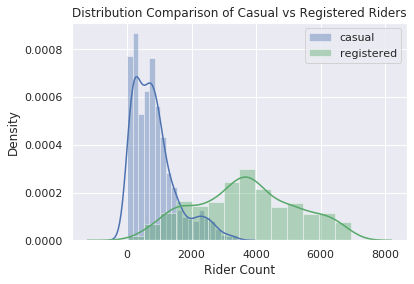

In [16]:
sns.distplot(daily_counts['casual'], color='b', label='casual')
sns.distplot(daily_counts['registered'], color='g', label='registered')
plt.xlabel('Rider Count')
plt.ylabel('Density')
plt.title('Distribution Comparison of Casual vs Registered Riders')
plt.legend();

### Question 2b

In the cell below, descibe the differences you notice between the density curves for casual and registered riders.  Consider concepts such as modes, symmetry, skewness, tails, gaps and outliers.  Include a comment on the spread of the distributions. 
<!--
BEGIN QUESTION
name: q2b
points: 2
manual: true
-->
<!-- EXPORT TO PDF -->

The majority of the data for casual riders is concentrated toward the left of the distribution at less than 2000, giving it a long-ish right tail. There are two modes, with the highest bars seemingly at a rider count less than 1000. The registered rider data is much more spread out, as it takes values nearly twice as high as the casual riders. It is a much more symmetric distribution, as well, centered near 4000. This indicates that there are more registered riders than casual riders, and that the frequency of the number of riders per day varies much more than for casual riders.

### Question 2c

The density plots do not show us how the counts for registered and casual riders vary together. Use [`sns.lmplot`](https://seaborn.pydata.org/generated/seaborn.lmplot.html) to make a scatter plot to investigate the relationship between casual and registered counts. This time, let's use the `bike` DataFrame to plot hourly counts instead of daily counts.

The `lmplot` function will also try to draw a linear regression line (just as you saw in Data 8). Color the points in the scatterplot according to whether or not the day is a working day (your colors do not have to match ours exactly, but they should be different based on whether the day is a working day). 

There are many points in the scatter plot, so make them small to help reduce overplotting. Also make sure to set `fit_reg=True` to generate the linear regression line. You can set the `height` parameter if you want to adjust the size of the `lmplot`. 

<img src='images/casual_registered_working_nonworking.png' width="600px" />

**Hints:** 
* Checkout this helpful [tutorial on `lmplot`](https://seaborn.pydata.org/tutorial/regression.html).

* You will need to set `x`, `y`, and `hue` and the `scatter_kws`.

<!--
BEGIN QUESTION
name: q2c
points: 2
manual: true
-->
<!-- EXPORT TO PDF -->

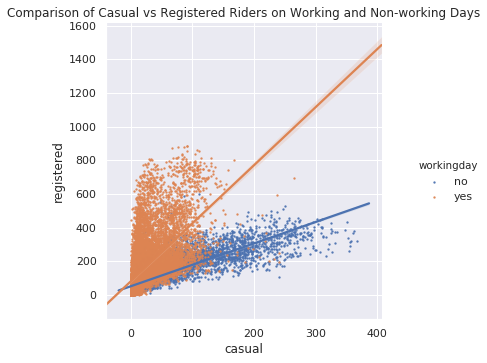

In [17]:
# Make the font size a bit bigger
hourly_counts = bike.groupby(['dteday', 'hr']).agg({'casual': 'sum', 'registered': 'sum', 'workingday': 'first'})
hourly_counts
sns.set(font_scale=1)
sns.lmplot(x="casual", y="registered", data=hourly_counts ,hue='workingday' ,fit_reg=True, scatter_kws={'s':2})
plt.title('Comparison of Casual vs Registered Riders on Working and Non-working Days');

### Question 2d

What does this scatterplot seem to reveal about the relationship (if any) between casual and registered riders and whether or not the day is on the weekend? What effect does [overplotting](http://www.textbook.ds100.org/ch/06/viz_principles_2.html) have on your ability to describe this relationship?

<!--
BEGIN QUESTION
name: q2d
points: 2
manual: true
-->
<!-- EXPORT TO PDF -->

There is a more linear relationship between registered and casual riders on days that are not working days. That is, there seems to be a relationship on weekends and holidays. On working days, the plot is less illuminating, as the data don't really cluster around the attempted regression line. Overplotting is definitely at play here, especially in the lower left corner of the plot. There is a continuous blob of data points that make it impossible to discern any sort of takeaway from the plot; taking a smaller sample of riders seems advisable.

---
## 3: Visualization

### Question 3

#### Question 3a Bivariate Kernel Density Plot
 
To address overplotting, let's try visualizing the data with another technique, the bivariate kernel density estimate.

You will want to read up on the documentation for `sns.kdeplot` which can be found at https://seaborn.pydata.org/generated/seaborn.kdeplot.html

The result we wish to achieve should be a plot that looks like this:

<img src='images/bivariate_kde_of_daily_rider_types.png' width="600px" />

You can think of this plot as an overhead countour or topographical map, where the "high" regions are those with more data points, and "low" regions are those with fewer data points.

A basic kde plot of all the data is quite easy to generate. However, this plot includes both weekend and weekday data, which isn't what we want (see example figure above).

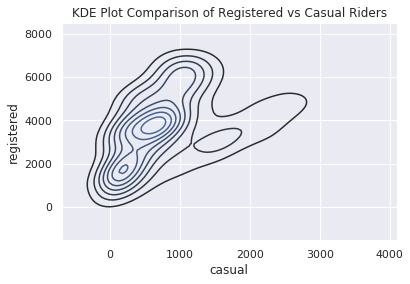

In [18]:
sns.kdeplot(daily_counts['casual'], daily_counts['registered'])
plt.title('KDE Plot Comparison of Registered vs Casual Riders');

Generating the plot with weekend and weekday separated can be complicated so we will provide a walkthrough below, feel free to use whatever method you wish however if you do not want to follow the walkthrough.

**Hints:** 
* You can use `loc` with a boolean array and column names at the same time
* You will need to call kdeplot twice.
* Check out this [tutorial](http://financeandpython.com/SeabornDataVisualization/8/3.html) to see an example of how to set colors for each dataset and how to create a legend. The legend part uses some weird matplotlib syntax that we haven't learned! You'll probably find creating the legend annoying, but it's a good exercise to learn how to use examples to get the look you want.
* You will want to set the `cmap` parameter of `kdeplot` to `"Reds"` and `"Blues"` (or whatever two contrasting colors you'd like). You are required for this question to use two sets of contrasting colors for your plots.

After you get your plot working, experiment by setting `shade=True` in `kdeplot` to see the difference between the shaded and unshaded version. Please submit your work with `shade=False`. 
<!--
BEGIN QUESTION
name: q3a
points: 5
manual: true
-->
<!-- EXPORT TO PDF -->

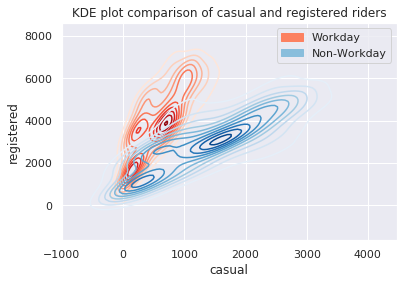

In [56]:
import matplotlib.patches as mpatches  # see the tutorial for how we use mpatches to generate this figure!

# Set 'is_workingday' to a boolean array that is true for all working_days
is_workingday = daily_counts['workingday']=='yes'

# Bivariate KDEs require two data inputs. 
# In this case, we will need the daily counts for casual and registered riders on workdays
casual_workday = daily_counts.loc[is_workingday, 'casual']
registered_workday = daily_counts.loc[is_workingday, 'registered'] 

# Use sns.kdeplot on the two variables above to plot the bivariate KDE for weekday rides
sns.kdeplot(casual_workday, registered_workday, cmap='Reds', shade=False)

# Repeat the same steps above but for rows corresponding to non-workingdays
casual_non_workday = daily_counts.loc[daily_counts['workingday']=='no', 'casual']
registered_non_workday = daily_counts.loc[daily_counts['workingday']=='no', 'registered']

# Use sns.kdeplot on the two variables above to plot the bivariate KDE for non-workingday rides
sns.kdeplot(casual_non_workday, registered_non_workday, cmap='Blues', shade=False)

plt.title('KDE plot comparison of casual and registered riders')

workday = mpatches.Patch(color=sns.color_palette("Reds")[2], label='Workday')
nonworkday = mpatches.Patch(color=sns.color_palette("Blues")[2], label='Non-Workday')

plt.legend(handles=[workday,nonworkday]);

#### Question 3b

What additional details can you identify from this contour plot that were difficult to determine from the scatter plot?

<!--
BEGIN QUESTION
name: q3b
points: 3
manual: true
-->
<!-- EXPORT TO PDF -->

It's much easier to see the data in the bottom left corner of the plot now. We see what looks like a local max for both bivariate distributions. It is also easier to see that on workdays, there are more registered users using bikes than casual riders. On non-workdays, there is a higher number of casual riders that rent bikes.

## 4: Joint Plot

As an alternative approach to visualizing the data, construct the following set of three plots where the main plot shows the contours of the kernel density estimate of daily counts for registered and casual riders plotted together, and the two "margin" plots (at the top and right of the figure) provide the univariate kernel density estimate of each of these variables. Note that this plot makes it harder see the linear relationships between casual and registered for the two different conditions (weekday vs. weekend).

<img src="images/joint_distribution_of_daily_rider_types.png" width="600px" />

**Hints**:
* The [seaborn plotting tutorial](https://seaborn.pydata.org/tutorial/distributions.html) has examples that may be helpful.
* Take a look at `sns.jointplot` and its `kind` parameter.
* `set_axis_labels` can be used to rename axes on the contour plot.
* `plt.suptitle` from lab 1 can be handy for setting the title where you want.
* `plt.subplots_adjust(top=0.9)` can help if your title overlaps with your plot

We do not expect you to match our colors exactly, but the colors you choose should not distract from the information your plot conveys!

<!--
BEGIN QUESTION
name: q4
points: 2
manual: true
-->
<!-- EXPORT TO PDF -->

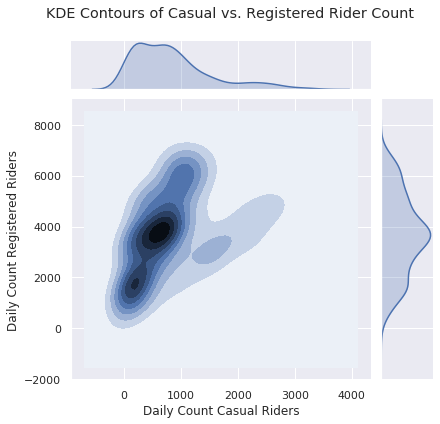

In [63]:
plott = sns.jointplot(x="casual", y="registered", data=daily_counts, kind="kde")
plott.set_axis_labels('Daily Count Casual Riders', 'Daily Count Registered Riders')
plt.suptitle('KDE Contours of Casual vs. Registered Rider Count')
plt.subplots_adjust(top=0.9);

---
## 5: Understanding Daily Patterns

### Question 5

#### Question 5a
Let's examine the behavior of riders by plotting the average number of riders for each hour of the day over the **entire dataset**, stratified by rider type.  

Your plot should look like the plot below. While we don't expect your plot's colors to match ours exactly, your plot should have different colored lines for different kinds of riders.

<img src="images/diurnal_bikes.png" width="600px"/>

<!--
BEGIN QUESTION
name: q5a
points: 2
manual: true
-->
<!-- EXPORT TO PDF -->

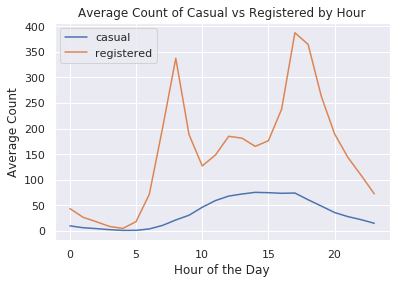

In [93]:
hourly_counts_avg = bike.groupby('hr').mean()
hourly_counts_avg
sns.lineplot(x=np.arange(0,24,1), y='casual', data=hourly_counts_avg, label='casual')
sns.lineplot(x=np.arange(0,24,1), y='registered', data=hourly_counts_avg, label='registered')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Count')
plt.title('Average Count of Casual vs Registered by Hour')
plt.legend();

#### Question 5b

What can you observe from the plot?  Hypothesize about the meaning of the peaks in the registered riders' distribution.
<!--
BEGIN QUESTION
name: q5b
points: 2
manual: true
-->
<!-- EXPORT TO PDF -->

On any given day, due to the lower number of casual users, the average casual plot is much lower than that of the registered users, and is a much smoother line. There are multiple peaks in the registered user plot. This could correspond to times of the day when people typically commute to and from work. There is one spike at around 7/8 AM, then a sharp dip with a local max around 12 (perhaps a lunch break), with another sharp uptick near 5 or 6 PM, a time many people leave work.

---
## 6: Exploring Ride Sharing and Weather
Now let's examine how the weather is affecting rider's behavior. First let's look at how the proportion of casual riders changes as weather changes.

### Question 6

#### Question 6a
Create a new column `prop_casual` in the `bike` DataFrame representing the proportion of casual riders out of all riders for each record.
<!--
BEGIN QUESTION
name: q6a
points: 1
-->

In [97]:
bike['prop_casual'] = bike['casual']/bike['cnt']
bike

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,prop_casual
0,1,2011-01-01,1,0,1,0,no,Sat,no,Clear,0.24,0.2879,0.81,0.0000,3,13,16,0.187500
1,2,2011-01-01,1,0,1,1,no,Sat,no,Clear,0.22,0.2727,0.80,0.0000,8,32,40,0.200000
2,3,2011-01-01,1,0,1,2,no,Sat,no,Clear,0.22,0.2727,0.80,0.0000,5,27,32,0.156250
3,4,2011-01-01,1,0,1,3,no,Sat,no,Clear,0.24,0.2879,0.75,0.0000,3,10,13,0.230769
4,5,2011-01-01,1,0,1,4,no,Sat,no,Clear,0.24,0.2879,0.75,0.0000,0,1,1,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,no,Mon,yes,Mist,0.26,0.2576,0.60,0.1642,11,108,119,0.092437
17375,17376,2012-12-31,1,1,12,20,no,Mon,yes,Mist,0.26,0.2576,0.60,0.1642,8,81,89,0.089888
17376,17377,2012-12-31,1,1,12,21,no,Mon,yes,Clear,0.26,0.2576,0.60,0.1642,7,83,90,0.077778
17377,17378,2012-12-31,1,1,12,22,no,Mon,yes,Clear,0.26,0.2727,0.56,0.1343,13,48,61,0.213115


In [98]:
ok.grade("q6a");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



#### Question 6b
In order to examine the relationship between proportion of casual riders and temperature, we can create a scatterplot using `sns.scatterplot`. We can even use color/hue to encode the information about day of week. Run the cell below, and you'll see we end up with a big mess that is impossible to interpret.

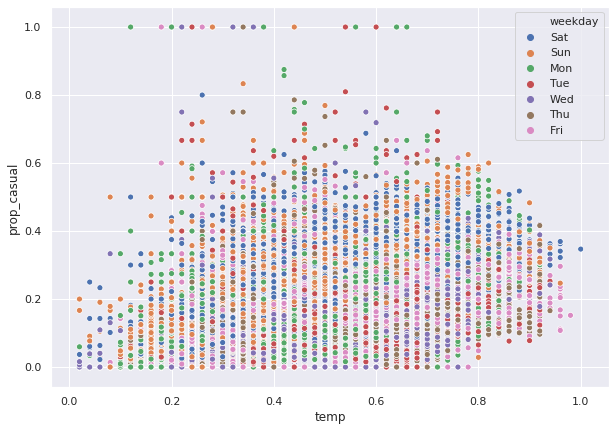

In [99]:
plt.figure(figsize=(10, 7))
sns.scatterplot(data=bike, x="temp", y="prop_casual", hue="weekday");

We could attempt linear regression using `sns.lmplot` as shown below, which hint at some relationships between temperature and proportional casual, but the plot is still fairly unconvincing. 

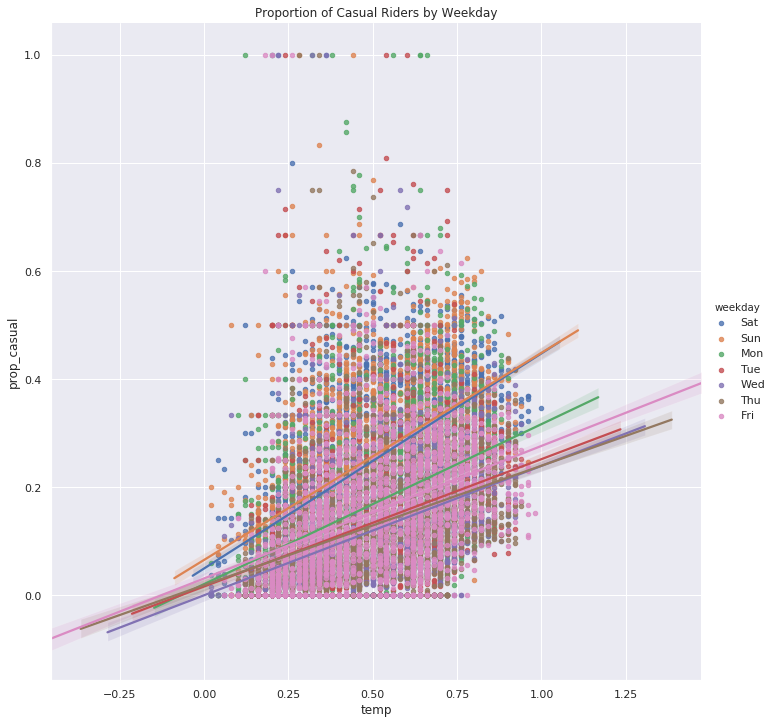

In [100]:
sns.lmplot(data=bike, x="temp", y="prop_casual", hue="weekday", scatter_kws={"s": 20}, height=10)
plt.title("Proportion of Casual Riders by Weekday");

A better approach is to use local smoothing. The basic idea is that for each x value, we compute some sort of representative y value that captures the data close to that x value. One technique for local smoothing is "Locally Weighted Scatterplot Smoothing" or LOWESS. An example is below. The red curve shown is a smoothed version of the scatterplot.

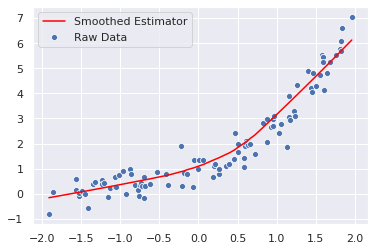

In [101]:
from statsmodels.nonparametric.smoothers_lowess import lowess
# Make noisy data
xobs = np.sort(np.random.rand(100)*4.0 - 2)
yobs = np.exp(xobs) + np.random.randn(100) / 2.0
sns.scatterplot(xobs, yobs, label="Raw Data")

# Predict 'smoothed' valued for observations
ysmooth = lowess(yobs, xobs, return_sorted=False)
sns.lineplot(xobs, ysmooth, label="Smoothed Estimator", color='red')
plt.legend();

In our case with the bike ridership data, we want 7 curves, one for each day of the week. The x-axis will be the temperature and the y-axis will be a smoothed version of the proportion of casual riders.

<img src="images/curveplot_temp_prop_casual.png" width="600px" />

You should use [`statsmodels.nonparametric.smoothers_lowess.lowess`](http://www.statsmodels.org/dev/generated/statsmodels.nonparametric.smoothers_lowess.lowess.html) just like the example above. Unlike the example above, plot ONLY the lowess curve. Do not plot the actual data, which would result in overplotting. For this problem, the simplest way is to use a loop.

You do not need to match the colors on our sample plot as long as the colors in your plot make it easy to distinguish which day they represent.

**Hints:** 
* Start by just plotting only one day of the week to make sure you can do that first.

* The `lowess` function expects y coordinate first, then x coordinate.

* Look at the top of this homework notebook for a description of the temperature field to know how to convert to Fahrenheit. By default, the temperature field ranges from 0.0 to 1.0. In case you need it, $\text{Fahrenheit} = \text{Celsius} * \frac{9}{5} + 32$.

Note: If you prefer plotting temperatures in Celsius, that's fine as well!
<!--
BEGIN QUESTION
name: q6b
points: 4
manual: true
-->
<!-- EXPORT TO PDF -->

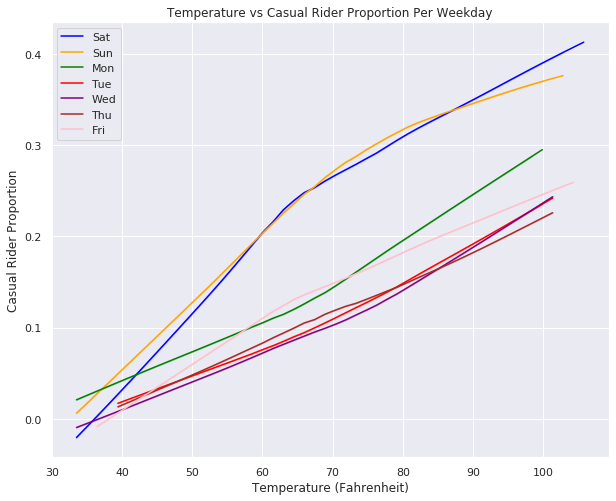

In [126]:
from statsmodels.nonparametric.smoothers_lowess import lowess

plt.figure(figsize=(10,8))

sat = lowess(bike.query("weekday=='Sat'")['prop_casual'], (((bike.query("weekday=='Sat'")['temp'])*41)*(9/5))+32, return_sorted=False)
sns.lineplot((((bike.query("weekday=='Sat'")['temp'])*41)*(9/5))+32, sat, label="Sat", color='blue')

sun = lowess(bike.query("weekday=='Sun'")['prop_casual'], (((bike.query("weekday=='Sun'")['temp'])*41)*(9/5))+32, return_sorted=False)
sns.lineplot((((bike.query("weekday=='Sun'")['temp'])*41)*(9/5))+32, sun, label="Sun", color='orange')

mon = lowess(bike.query("weekday=='Mon'")['prop_casual'], (((bike.query("weekday=='Mon'")['temp'])*41)*(9/5))+32, return_sorted=False)
sns.lineplot((((bike.query("weekday=='Mon'")['temp'])*41)*(9/5))+32, mon, label="Mon", color='green')

tue = lowess(bike.query("weekday=='Tue'")['prop_casual'], (((bike.query("weekday=='Tue'")['temp'])*41)*(9/5))+32, return_sorted=False)
sns.lineplot((((bike.query("weekday=='Tue'")['temp'])*41)*(9/5))+32, tue, label="Tue", color='red')

wed = lowess(bike.query("weekday=='Wed'")['prop_casual'], (((bike.query("weekday=='Wed'")['temp'])*41)*(9/5))+32, return_sorted=False)
sns.lineplot((((bike.query("weekday=='Wed'")['temp'])*41)*(9/5))+32, wed, label="Wed", color='purple')

thu = lowess(bike.query("weekday=='Thu'")['prop_casual'], (((bike.query("weekday=='Thu'")['temp'])*41)*(9/5))+32, return_sorted=False)
sns.lineplot((((bike.query("weekday=='Thu'")['temp'])*41)*(9/5))+32, thu, label="Thu", color='brown')

fri = lowess(bike.query("weekday=='Fri'")['prop_casual'], (((bike.query("weekday=='Fri'")['temp'])*41)*(9/5))+32, return_sorted=False)
sns.lineplot((((bike.query("weekday=='Fri'")['temp'])*41)*(9/5))+32, fri, label="Fri", color='pink')
plt.xlabel('Temperature (Fahrenheit)')
plt.ylabel('Casual Rider Proportion')
plt.title('Temperature vs Casual Rider Proportion Per Weekday');

#### Question 6c
What do you see from the curve plot? How is `prop_casual` changing as a function of temperature? Do you notice anything else interesting?
<!--
BEGIN QUESTION
name: q6c
points: 2
manual: true
-->
<!-- EXPORT TO PDF -->

We see that, generally, the proportion of casual riders increases the higher the temperature becomes. On some days, it increases faster at lower temperatures and then the proportion grows more slowly in the hotter temp range, and on other days vice versa. Overall, though, these curves exhibit and upward trend.

## Question 7: Expanding our Analysis

### Question 7
#### Question 7A

Imagine you are working for a Bike Sharing Company that collaborates with city planners, transportation agencies, and policy makers in order to implement bike sharing in a city. These stakeholders would like to reduce congestion and lower transportation costs. They also want to ensure the bike sharing program is implemented equitably. In this sense, equity is a social value that is informing the deployment and assessment of your bike sharing technology. 

Equity in transportation includes: improving the ability of people of different socio-economic classes, genders, races, and neighborhoods to access and afford the transportation services, and assessing how inclusive transportation systems are over time. 

Do you think the `bike` data as it is can help you assess equity? If so, please explain. If not, how would you change the dataset? You may discuss how you would change the granularity, what other kinds of variables you'd introduce to it, or anything else that might help you answer this question.

<!--
BEGIN QUESTION
name: q7a
points: 2
manual: true
-->
<!-- EXPORT TO PDF -->

I think that examining the workingday variable can help assess equity. If a lot of people need to work monday-friday, it may be possible to make sure there are enough bikes available for people to commute to/from work. Examining also the average hourly usage of bikes can point to when, if at all possible, more bikes should be available so as to reduce a backlog of people who need transportation at certain hours of the day. 

However, I think an important feature in assessing equity is geographic location within a particular city, as well as having information on the demographics of a particular area. Having this information would be useful in focusing on  lower-income areas, neighborhoods with subpar transportation options, and so forth. This would help pointedly provide bike sharing in places that really need it. This can be added to each data point by either having the neighborhood name where the bike was accessed, or providing geospatial coordinates (though the name would be easier I think). Then you could investigate which areas exhibit higher bike sharing activity, and also highlight places where there aren't any options for bike sharing.

In [127]:
bike

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,prop_casual
0,1,2011-01-01,1,0,1,0,no,Sat,no,Clear,0.24,0.2879,0.81,0.0000,3,13,16,0.187500
1,2,2011-01-01,1,0,1,1,no,Sat,no,Clear,0.22,0.2727,0.80,0.0000,8,32,40,0.200000
2,3,2011-01-01,1,0,1,2,no,Sat,no,Clear,0.22,0.2727,0.80,0.0000,5,27,32,0.156250
3,4,2011-01-01,1,0,1,3,no,Sat,no,Clear,0.24,0.2879,0.75,0.0000,3,10,13,0.230769
4,5,2011-01-01,1,0,1,4,no,Sat,no,Clear,0.24,0.2879,0.75,0.0000,0,1,1,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,no,Mon,yes,Mist,0.26,0.2576,0.60,0.1642,11,108,119,0.092437
17375,17376,2012-12-31,1,1,12,20,no,Mon,yes,Mist,0.26,0.2576,0.60,0.1642,8,81,89,0.089888
17376,17377,2012-12-31,1,1,12,21,no,Mon,yes,Clear,0.26,0.2576,0.60,0.1642,7,83,90,0.077778
17377,17378,2012-12-31,1,1,12,22,no,Mon,yes,Clear,0.26,0.2727,0.56,0.1343,13,48,61,0.213115


#### Question 7B
[Bike sharing is growing in popularity](https://www.bts.gov/newsroom/bike-share-stations-us) and new cities and regions are making efforts to implement bike sharing systems that complement their other transportation offerings. The [goals of these efforts](https://www.wired.com/story/americans-falling-in-love-bike-share/) are to have bike sharing serve as an alternate form of transportation in order to alleviate congestion, provide geographic connectivity, reduce carbon emissions, and promote inclusion among communities.

Bike sharing systems have spread to many cities across the country. The company you work for asks you to determine the feasibility of expanding bike sharing to additional cities of the U.S. 

Based on your plots in this assignment, what would you recommend and why? Please list at least two reasons why, and mention which plot(s) you drew you analysis from. 

**Note**: There isn't a set right or wrong answer for this question, feel free to come up with your own conclusions based on evidence from your plots! 

<!--
BEGIN QUESTION
name: q7b
points: 2
manual: true
-->
<!-- EXPORT TO PDF -->

I believe there is high feasibility in expanding bike sharing services to other cities in the US. I am basing feasibility largely on whether or not I think people will use the sharing service enough to warrant expansion within US cities. Based firstly on the initial histogram showing the distribution of casual vs registered users, the distribution showed how many people actually registered with the service. There are quite a lot (in the thousands), and so I think this shows that people would "go for" a bike sharing service in other cities. Supplemented by the number of casual users, it would serve as a good more for transportation that compliments the needs of commuters and those using the service more infrequently. 

Second, the plot of average hourly usage of the bikes highlights the feasibility of expansion. The daily averages highlight a clear need for transportation at peak work commute hours. Driving is expensive, and other public transport can be as well, so having a bike sharing service as an alternate option would alleviate financial stress associated with travel. One could argue that having more bikes on the road would increase congestion and the likelihood of car-bike accidents. However, if the local infrastructure were slightly modified (i.e. if more bike lanes were added, something which amounts to just painting more lines in the street) this issue could be alleviated. I think doing this would also reduce emissions if people are given a bike sharing option that is cheap and convenient (though that is difficult to asses given the current data set).

In [ ]:
# Use this cell for scratch work. If you need to add more cells for scratch work, add them BELOW this cell.

# Submit
Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output.
**Please save before submitting!**

<!-- EXPECT 15 EXPORTED QUESTIONS -->

In [ ]:
# Save your notebook first, then run this cell to submit.
import jassign.to_pdf
jassign.to_pdf.generate_pdf('hw3.ipynb', 'hw3.pdf')
ok.submit()